In [2]:
import tensorflow as tf
tf.__version__

'2.10.1'

In [7]:
# custom training loop

# f(x)= wx + b
# b= 0
# J= (wx - 1)**2

w= tf.Variable(3.0)

x= 1.0
y= 1.0 # target value

alpha= 0.1

iterations= 30
for iter in range(iterations):
    # Use tensorflow's Gradient tape to record the tape to record the steps used to compute the cost J, to enable auto differentiation
    with tf.GradientTape() as tape:
        fwb= w*x
        costJ= (fwb-y)**2
        print(f'costJ: {costJ}')

    # Use the gradient tape to calculate the gradients of the cost with respect to the parameter w
    [dJ_dw]= tape.gradient(costJ, [w])
    print(f'dJ_dw: {dJ_dw}\n')

    # Run one step of gradient descent by updating the value of w to reduce the cost
    w.assign_add(-alpha*dJ_dw)



costJ: 4.0
dJ_dw: 4.0

costJ: 2.559999704360962
dJ_dw: 3.1999998092651367

costJ: 1.6383999586105347
dJ_dw: 2.559999942779541

costJ: 1.0485758781433105
dJ_dw: 2.047999858856201

costJ: 0.6710885167121887
dJ_dw: 1.6383998394012451

costJ: 0.429496705532074
dJ_dw: 1.3107199668884277

costJ: 0.2748778462409973
dJ_dw: 1.0485758781433105

costJ: 0.17592184245586395
dJ_dw: 0.8388607501983643

costJ: 0.1125900149345398
dJ_dw: 0.671088695526123

costJ: 0.07205760478973389
dJ_dw: 0.5368710160255432

costJ: 0.046116869896650314
dJ_dw: 0.42949676513671875

costJ: 0.029514793306589127
dJ_dw: 0.343597412109375

costJ: 0.01888948306441307
dJ_dw: 0.27487799525260925

costJ: 0.012089278548955917
dJ_dw: 0.21990250051021576

costJ: 0.0077371299266815186
dJ_dw: 0.17592191696166992

costJ: 0.004951763432472944
dJ_dw: 0.14073753356933594

costJ: 0.0031691312324255705
dJ_dw: 0.11259007453918457

costJ: 0.0020282482728362083
dJ_dw: 0.0900721549987793

costJ: 0.0012980789178982377
dJ_dw: 0.07205772399902344


In [ ]:
# Instantiate the optimizer 
optimizer= tf.keras.optimizers.Adam(learning_rate=1e-1)

iterations= 200
for iter in range(iterations):
    # Use tensorflow's Gradient tape to record the tape to record the steps used to compute the cost J, to enable auto differentiation
    with tf.GradientTape() as tape:
        costJ = (fwb-y)**2

    # Use the gradient tape to calculate the gradients of the cost with respect to the parameter variables
    grads = tape.gradient(costJ, [X, W, b])

    # Run one step of gradient descent by updating the value of variables to reduce the cost
    optimizer.apply_gradients(zip(grads, [X, W, b]))


In [4]:
# Content Based Filtering

user_NN= tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32),
])

item_NN= tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32),
])

In [ ]:
# create the user-input and point to the base network
input_user= tf.keras.layers.Input(shape=(num_user_features))
vu= user_NN(input_user)
vu= tf.linalg.l2_normalize(vu, axis= 1)

# create the item-input and point to the base network
input_item= tf.keras.layers.Input(shape=(num_item_features))
vm= user_NN(input_item)
vm= tf.linalg.l2_normalize(vm, axis= 1)

# measure the similarity of two vector outputs
output= tf.keras.layers.Dot(axes=1)([vu, vm])

# specify the inputs and outputs of the model
model= tf.keras.Model([input_user, input_item], output)

# specify the cost function
cost_fn= tf.keras.losses.mean_squared_error()

In [ ]:
# PCA in scikit-learn
# Optional pre-preocessing: feature scaling
# 1. "fit" the data to obtain 2(or 3) new axes (principal components)
'fit()-> includes mean normalization'
# 2. Optionally examine how much variance is explained by each principal component.
'explained_variance_ratio()'
# 3. Transform(project) the data onto the new axes.
'transform()'



In [6]:
import matplotlib.pyplot as plt

In [11]:
import numpy as np
X= np.array([(1,1), (2, 1), (3, 2), (-1, -1), (-2, -1), (-3, -2)])


In [16]:
print(X[:, 0])
print(X[:, 1])

[ 1  2  3 -1 -2 -3]
[ 1  1  2 -1 -1 -2]


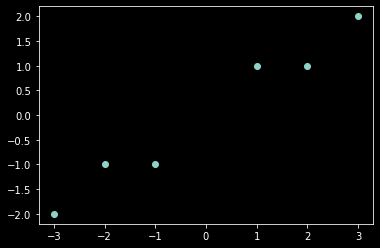

In [23]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

[[ 1.15997501  0.75383654]
 [ 1.86304424  1.21074232]
 [ 3.02301925  1.96457886]
 [-1.15997501 -0.75383654]
 [-1.86304424 -1.21074232]
 [-3.02301925 -1.96457886]]


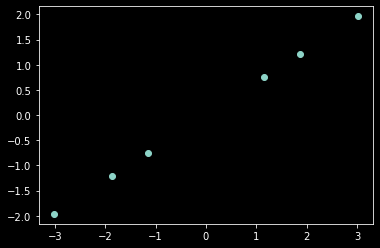

In [30]:
from sklearn.decomposition import PCA
pca_1= PCA(n_components=1)
pca_1.fit(X)
pca_1.explained_variance_ratio_  # array([0.99244289])
X_transformed_1= pca_1.transform(X)
X_reduced_1= pca_1.inverse_transform(X_transformed_1)
print(X_reduced_1)
plt.scatter(X_reduced_1[:, 0], X_reduced_1[:, 1])
plt.show()

[[ 1.  1.]
 [ 2.  1.]
 [ 3.  2.]
 [-1. -1.]
 [-2. -1.]
 [-3. -2.]]


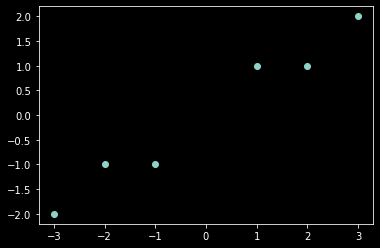

In [32]:
from sklearn.decomposition import PCA
pca_1 = PCA(n_components=2)
pca_1.fit(X)
pca_1.explained_variance_ratio_ 
X_transformed_1 = pca_1.transform(X)
X_reduced_1 = pca_1.inverse_transform(X_transformed_1)
print(X_reduced_1)
plt.scatter(X_reduced_1[:, 0], X_reduced_1[:, 1])
plt.show()
